# G2M insight for Cab Investment firm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset:

In [2]:
Cab_data = pd.read_csv("Cab_Data.csv")
Cus_ID =  pd.read_csv("Customer_ID.csv")
Trans_ID = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

In [3]:
Cab_data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [4]:
Trans_ID.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [5]:
Cus_ID.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [6]:
City.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [7]:
# Information of dataset
Cab_data.info()
Cus_ID.info()
Trans_ID.info()
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [8]:
# The shape of dataset
print("Cab_Data", Cab_data.shape)
print("Customer_ID", Cus_ID.shape)
print("Transaction_ID", Trans_ID.shape)
print("City", City.shape)

Cab_Data (359392, 7)
Customer_ID (49171, 4)
Transaction_ID (440098, 3)
City (20, 3)


## Data Cleaning and Visualization:

In [9]:
for col in Cab_data.columns:
    if ' ' in col:
        Cab_data = Cab_data.rename(columns={col:col.replace(' ','_')})

In [10]:
Cab_data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [11]:
for col in Trans_ID.columns:
    if ' ' in col:
        Trans_ID = Trans_ID.rename(columns={col:col.replace(' ','_')})

In [12]:
Trans_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [13]:
for col in Cus_ID.columns:
    if ' ' in col:
        Cus_ID = Cus_ID.rename(columns={col:col.replace(' ','_')})

In [14]:
Cus_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [15]:
Cab_data.head()

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [16]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [17]:
# convertion of serial date to datetime
def excel_date(num):
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(num, 'D')

# Applying the conversion for serial dates
Cab_data['Date_of_Travel'] = Cab_data['Date_of_Travel'].apply(lambda x: excel_date(x) if isinstance(x, (int, float)) else x)

Cab_data['Date_of_Travel'] = pd.to_datetime(Cab_data['Date_of_Travel'], format='%d/%m/%Y', errors='coerce')


In [18]:
Cab_data.head()

Transaction_ID Date_of_Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [19]:
months=[]
years =[]
for i in range(len(Cab_data['Date_of_Travel'])):
    months.append(Cab_data['Date_of_Travel'][i].month)
    years.append(Cab_data['Date_of_Travel'][i].year)
Cab_data['Month'] = months
Cab_data['Year'] = years

Cab_data.drop('Date_of_Travel', axis=1, inplace=True)

In [20]:
# splitting the dataset into Pink Cab and Yellow Cab
PinkCab = Cab_data[Cab_data['Company']=='Pink Cab']
YellowCab = Cab_data[Cab_data['Company']=='Yellow Cab']

In [21]:
Cab_data.head()

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016  
3       351.602      1  2016  
4        97.776      1  2016

# **Exploratory Data Analysis**

### Monthly Transaction Analysis:

In [22]:
#For Pink Cab
plot0 = Cab_data[Cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

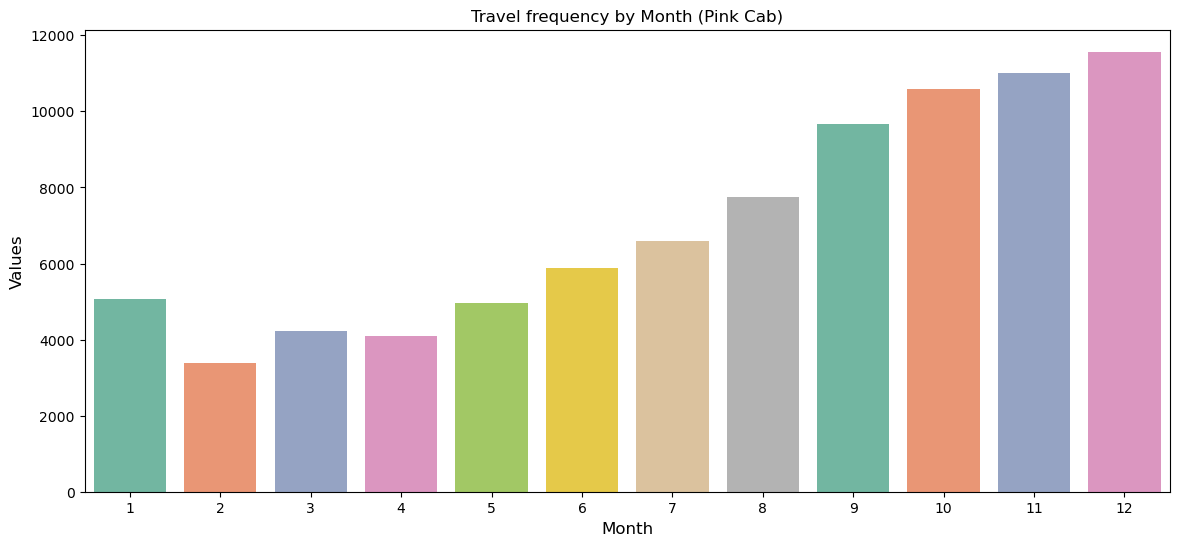

In [23]:
plt.figure(figsize=(14, 6))
sns.barplot(x=plot0.index, y=plot0.values, palette='Set2')  # You can choose any palette name
plt.title('Travel frequency by Month (Pink Cab)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [24]:
#For Yellow Cab
plot1 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

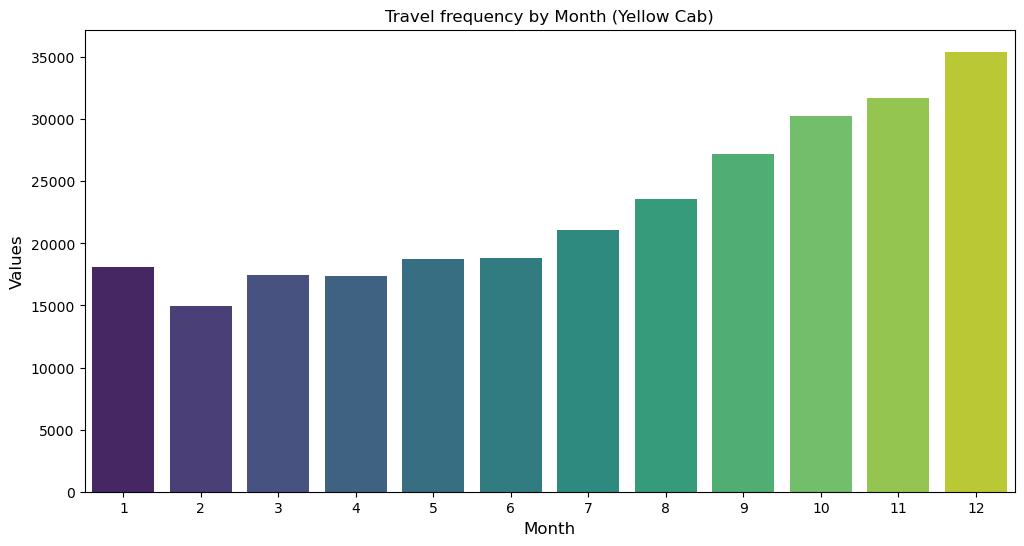

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=plot1.index, y=plot1.values, palette='viridis')  # Predefined palette
plt.title('Travel frequency by Month (Yellow Cab)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()


>**Yellow Cab has higher travels (35000) in the month of December which is the holiday season compared to Pink Cab (11000).**

In [26]:
total_distance = Cab_data['KM_Travelled'].describe()
PCab_distance = PinkCab['KM_Travelled'].describe()
YCab_distance = YellowCab['KM_Travelled'].describe()

In [27]:
df = pd.DataFrame({'Total': total_distance.values,
                  'Pink Cab': PCab_distance.values,
                  'Yellow Cab': YCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

Total      Pink Cab     Yellow Cab
Count      359392.000000  84711.000000  274681.000000
Mean           22.567254     22.559917      22.569517
Std. Dev.      12.233526     12.231092      12.234298
Min             1.900000      1.900000       1.900000
25%            12.000000     12.000000      11.990000
50%            22.440000     22.440000      22.440000
75%            32.960000     32.960000      32.960000
Max            48.000000     48.000000      48.000000

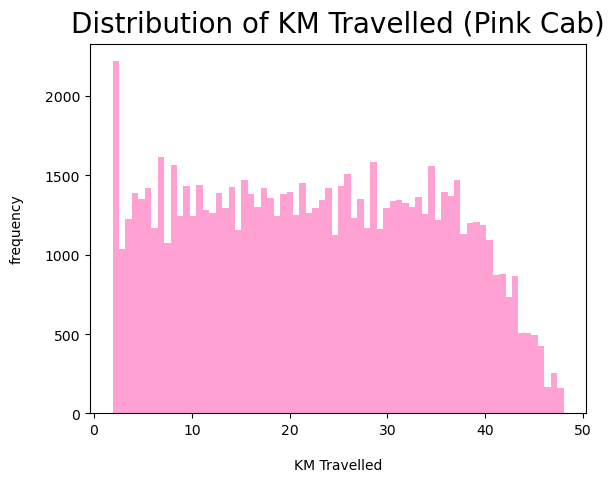

In [28]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='#FF1493', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

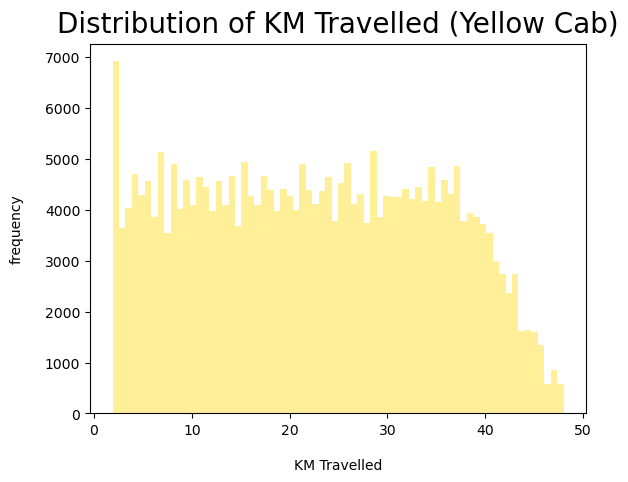

In [29]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='#FFD700',bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

>**From the above graphs, we can see that most of the rides are in the range of approximately between 2 to 48 KM.**

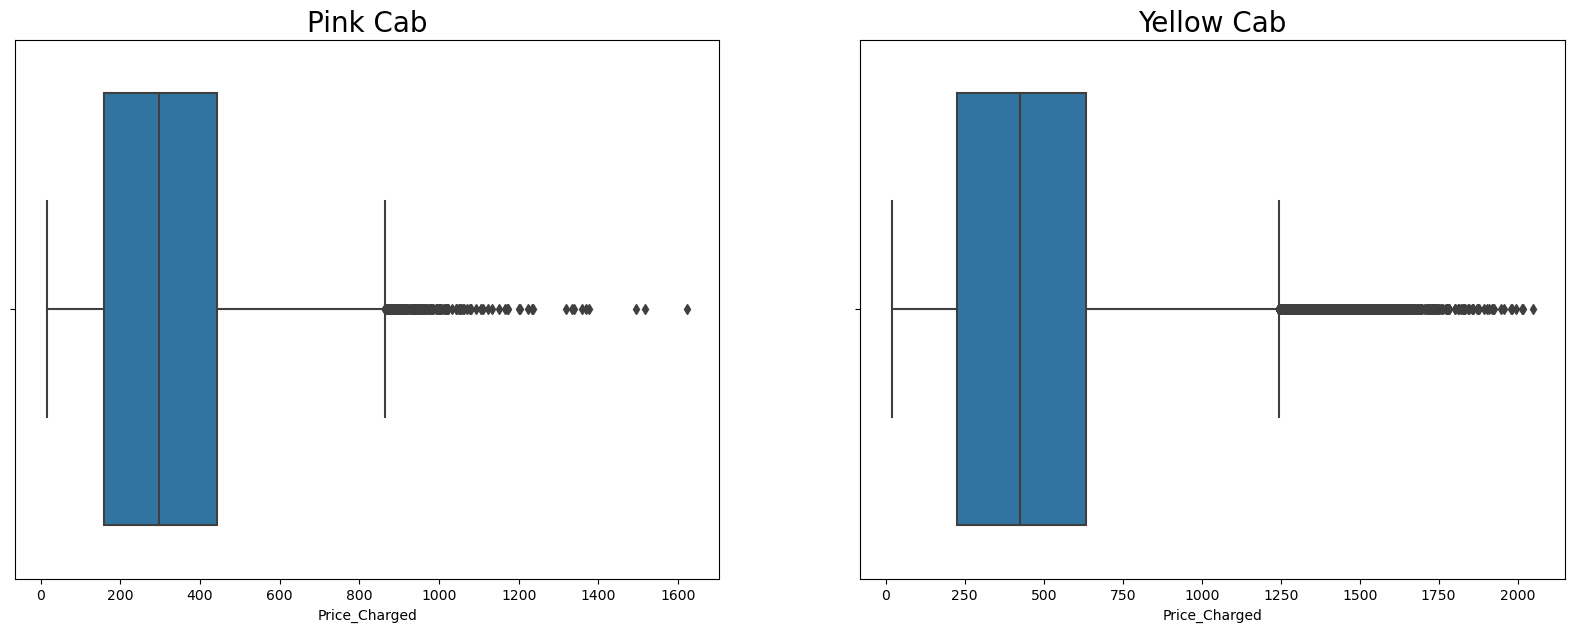

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming PinkCab and YellowCab are DataFrames
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))

sns.boxplot(x=PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)

sns.boxplot(x=YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()


**Outliers**

>These are because of considering high-end cars, hence included them.

>For Yellow cab, the price charge range is more compared to Pink cab.


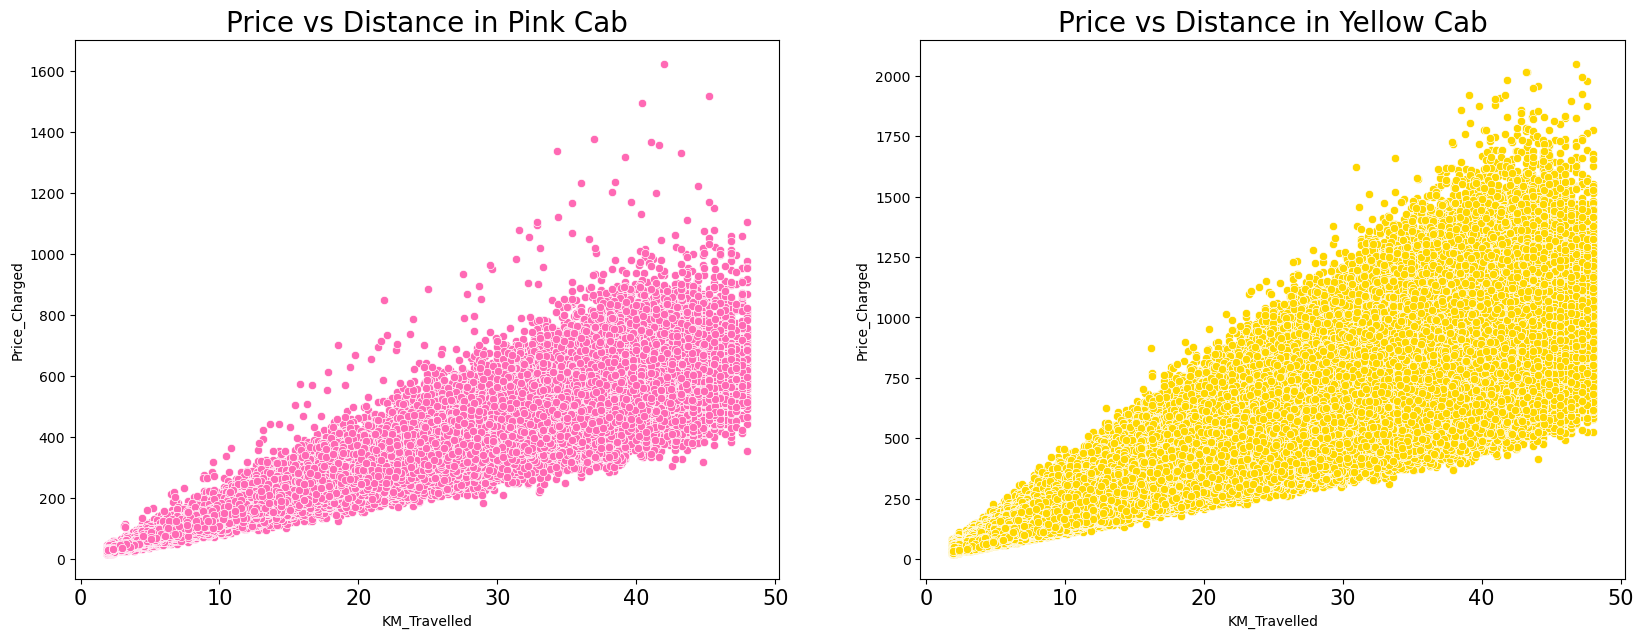

In [31]:


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

# Creating scatterplot for PinkCab
sns.scatterplot(x='KM_Travelled', y='Price_Charged', data=PinkCab, ax=ax1, color='#FF69B4')
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)

# Creating scatterplot for YellowCab
sns.scatterplot(x='KM_Travelled', y='Price_Charged', data=YellowCab, ax=ax2, color='#FFD700')
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

plt.show()


In [32]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594862

In [33]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.8597086294478473

>* It is oberserved that there is positive correlation in the graph for both Pink and Yellow cab.

>* Also, for raising the price of the rides, distance is main factor to consider.

>* Yellow cab has more prices compared to Pink cab.

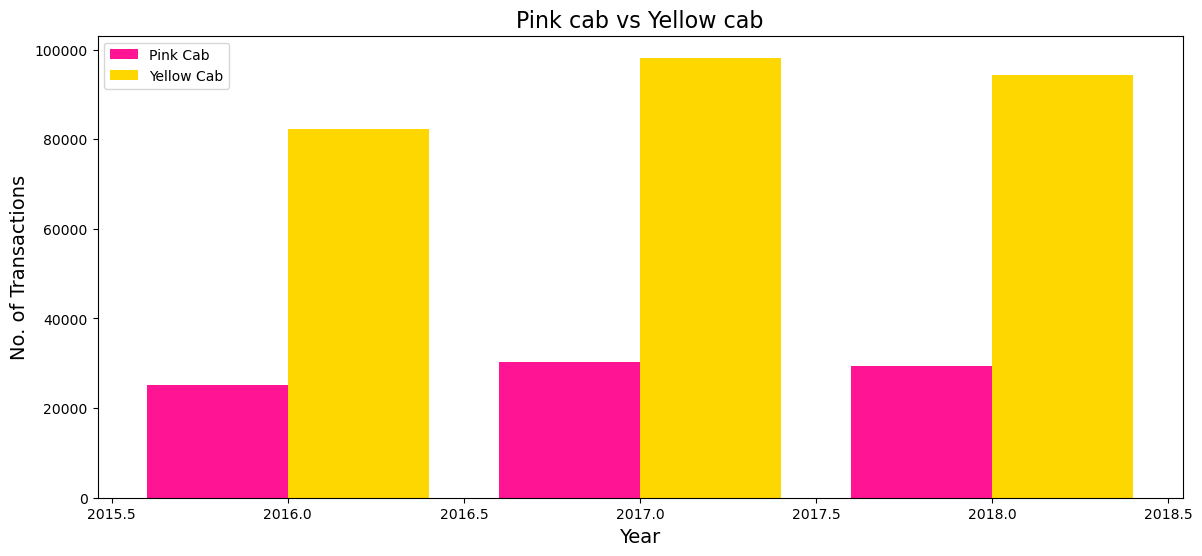

In [34]:
plot1 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='#FF1493', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='#FFD700', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

> **From the above bar graph, we can see that Yellow cab have more transactions than Pink cab.**

## **Pink Cab:**

In [35]:
Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

In [36]:
Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

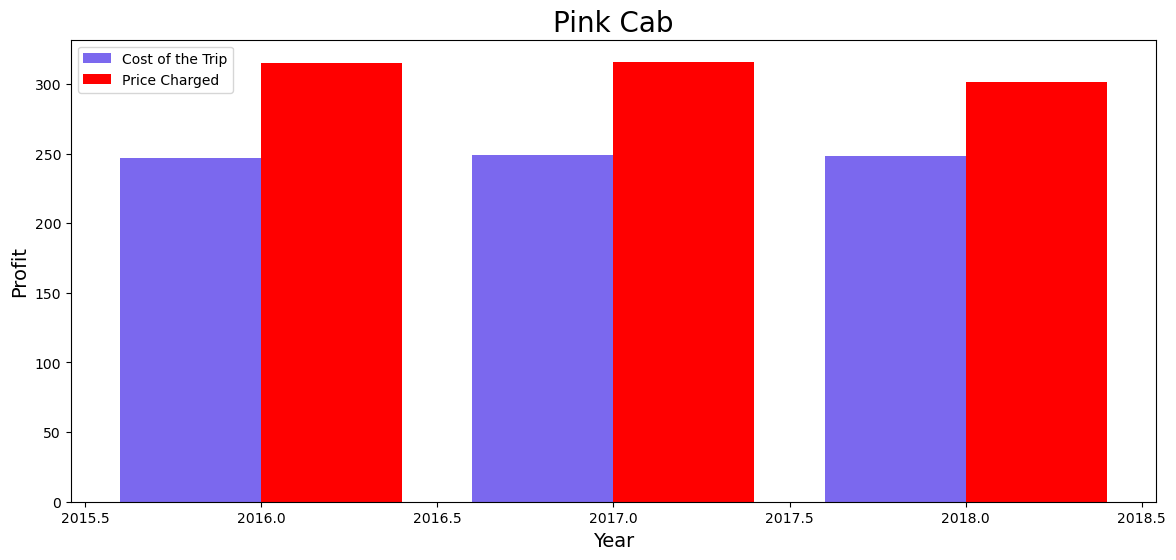

In [37]:
plot1 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='#7B68EE', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='#FF0000', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

## **Yellow Cab:**

In [38]:
Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [39]:
Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

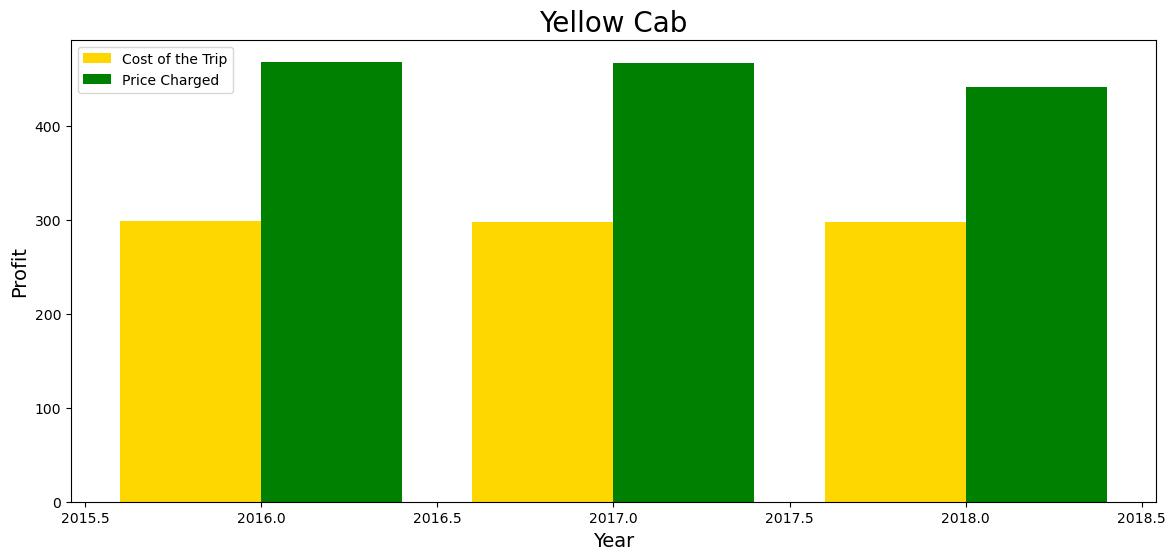

In [40]:
plot1 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='#FFD700', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='green', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

>**From the above graph, the Yellow cab have higher profit margin when compared to Pink cab**

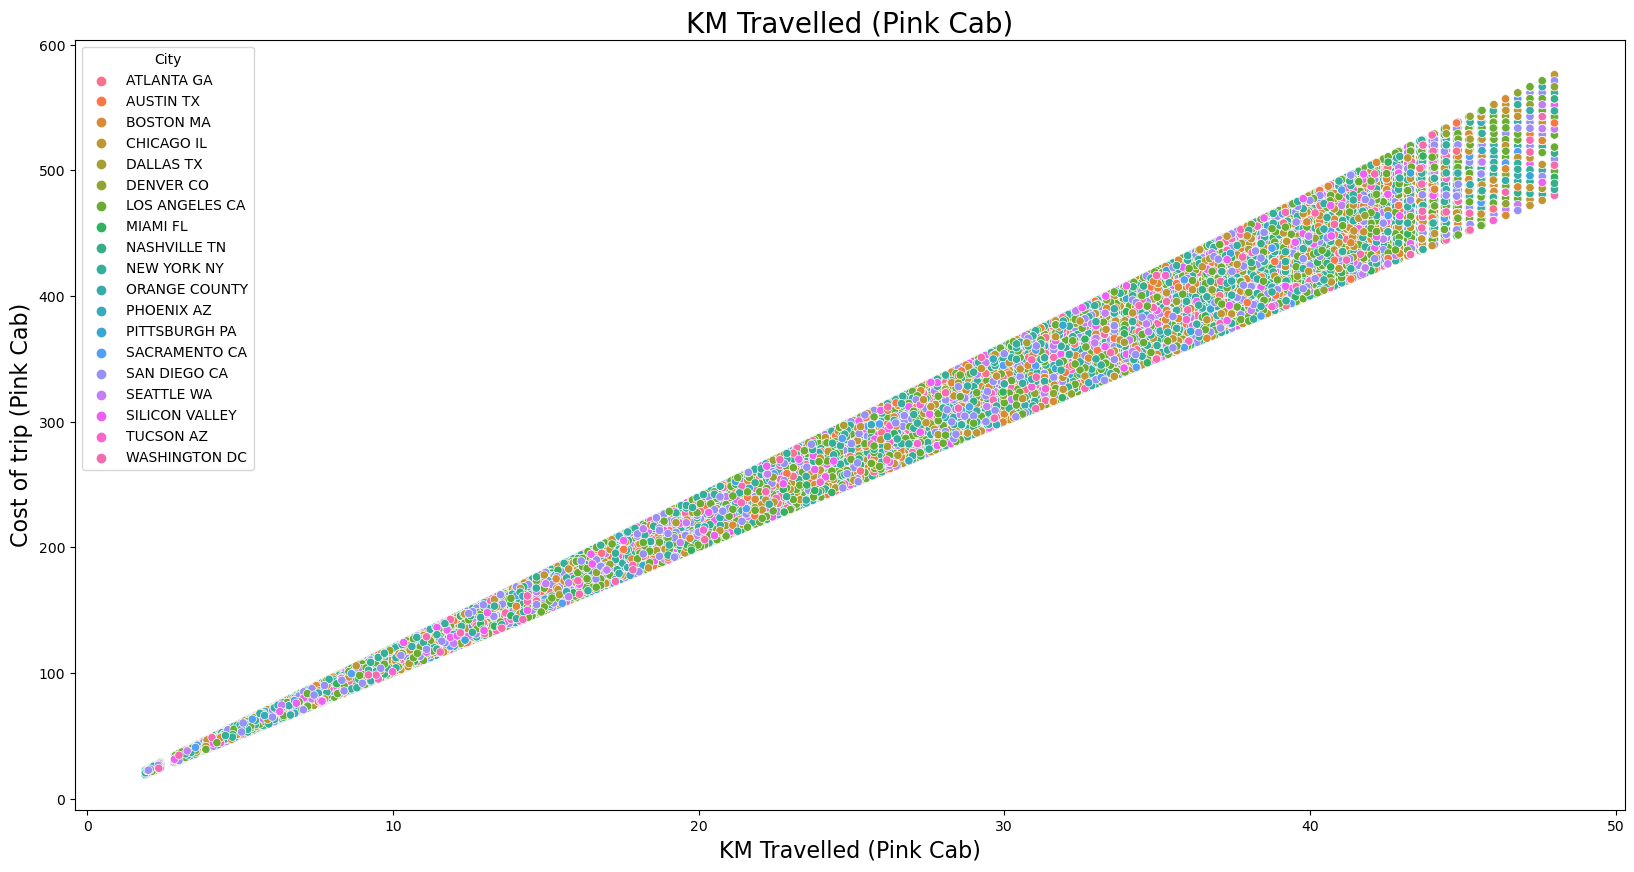

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('KM Travelled (Pink Cab)',fontsize = 20)
plt.ylabel('Cost of trip (Pink Cab)',fontsize = 16)
plt.xlabel('KM Travelled (Pink Cab)',fontsize = 16)
plt.show()

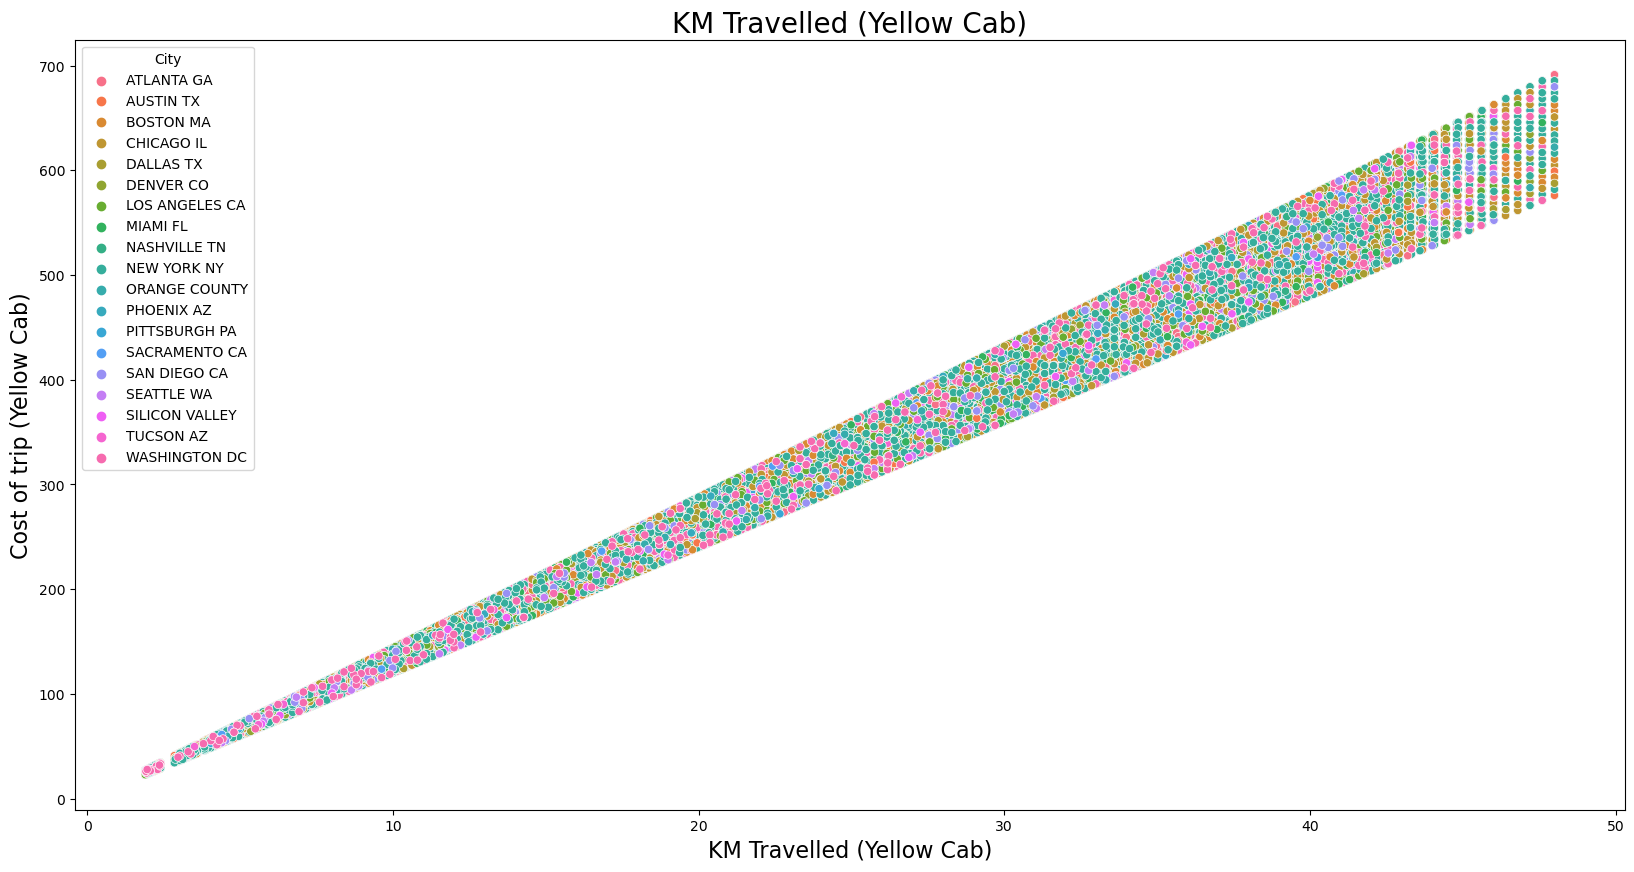

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('KM Travelled (Yellow Cab)',fontsize = 20)
plt.ylabel('Cost of trip (Yellow Cab)',fontsize = 16)
plt.xlabel('KM Travelled (Yellow Cab)',fontsize = 16)
plt.show()

> **From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.**

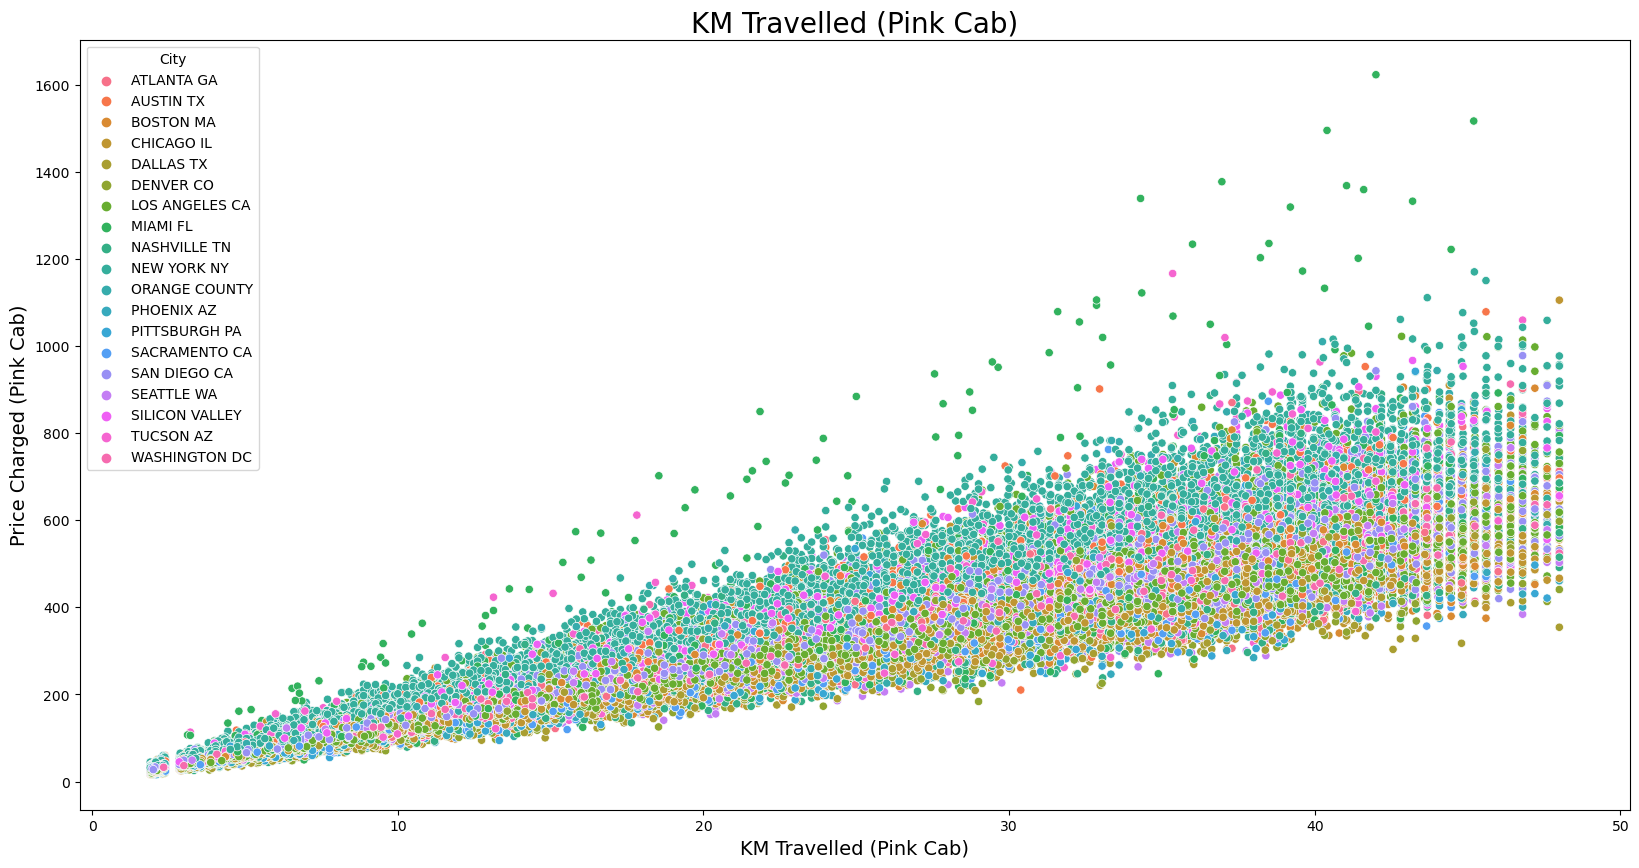

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('KM Travelled (Pink Cab)',fontsize = 20)
plt.ylabel('Price Charged (Pink Cab)',fontsize = 14)
plt.xlabel('KM Travelled (Pink Cab)',fontsize = 14)
plt.show()

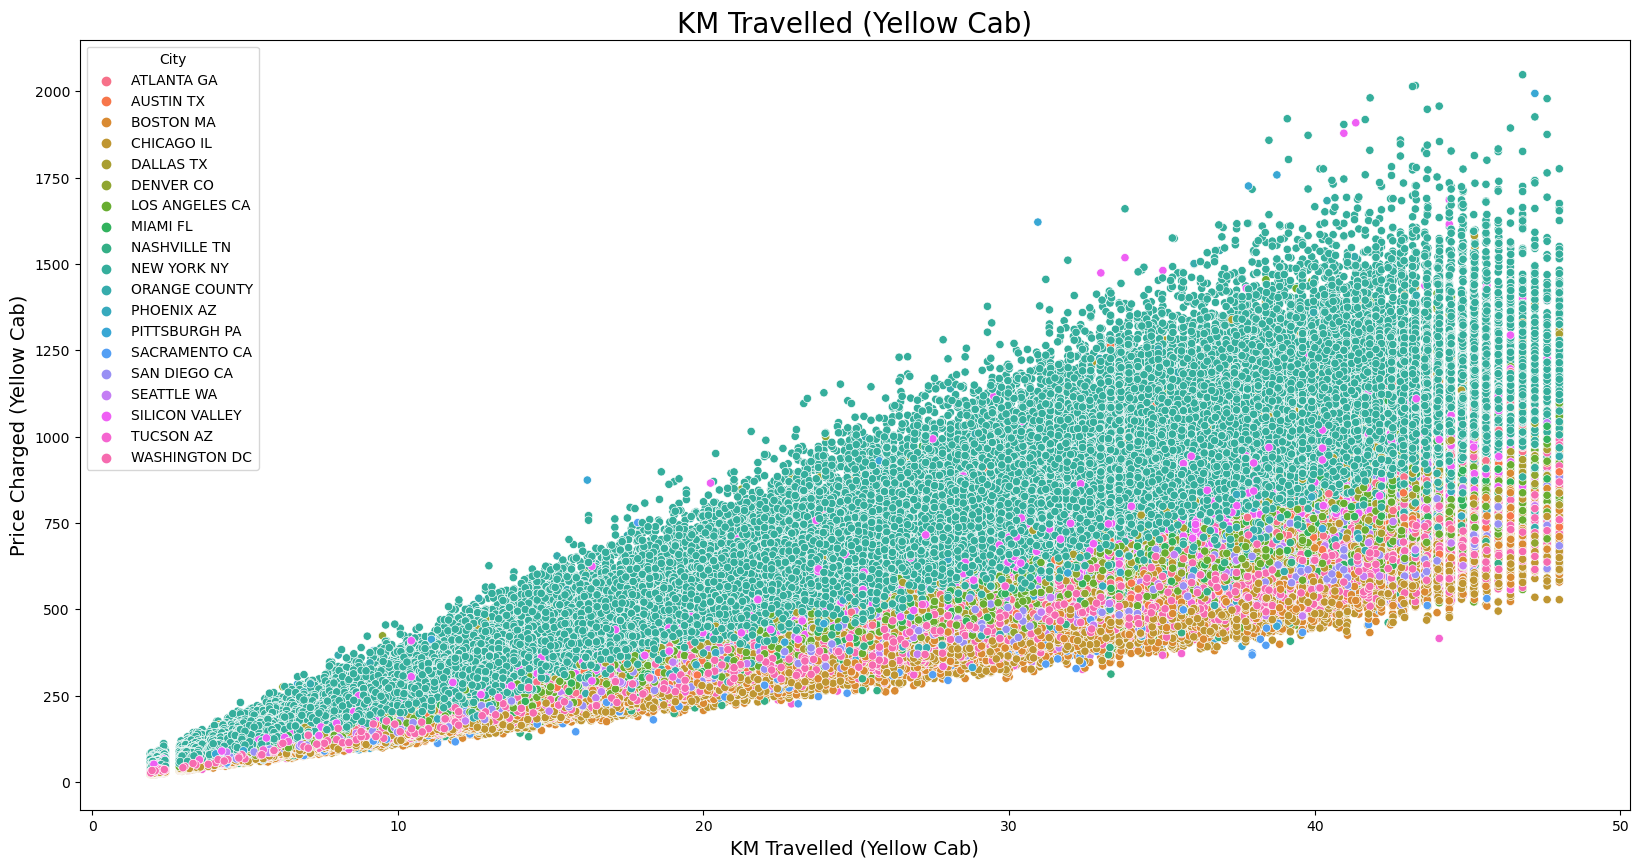

In [44]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('KM Travelled (Yellow Cab)',fontsize = 20)
plt.ylabel('Price Charged (Yellow Cab)',fontsize = 14)
plt.xlabel('KM Travelled (Yellow Cab)',fontsize = 14)
plt.show()

> * From the above graphs, it is clear that in New York City, the Yellow Cab price is higher than other cities. 
 
> * In both the graphs, outliers existed which may be due to high end cars.

> * For Pink cab all the cities have the same increase in prices with increase in distance.

## Created Master Data:

In [45]:
left = Cab_data.set_index(['Transaction_ID'])
right = Trans_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID                                                      
10000011        Pink Cab  ATLANTA GA         30.45         370.95   
10000012        Pink Cab  ATLANTA GA         28.62         358.52   
10000013        Pink Cab  ATLANTA GA          9.04         125.20   
10000014        Pink Cab  ATLANTA GA         33.17         377.40   
10000015        Pink Cab  ATLANTA GA          8.73         114.62   

                Cost_of_Trip  Month  Year  Customer_ID Payment_Mode  
Transaction_ID                                                       
10000011             313.635      1  2016        29290         Card  
10000012             334.854      1  2016        27703         Card  
10000013              97.632      1  2016        28712         Cash  
10000014             351.602      1  2016        28020         Cash  
10000015              97.776      1  2016        27182         Card

In [46]:
left = data.set_index([data.index,'Customer_ID'])
right = Cus_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID                                                      
10000011       29290        Pink Cab  ATLANTA GA         30.45         370.95   
10000012       27703        Pink Cab  ATLANTA GA         28.62         358.52   
10000013       28712        Pink Cab  ATLANTA GA          9.04         125.20   
10000014       28020        Pink Cab  ATLANTA GA         33.17         377.40   
10000015       27182        Pink Cab  ATLANTA GA          8.73         114.62   

                            Cost_of_Trip  Month  Year Payment_Mode Gender  \
Transaction_ID Customer_ID                                                  
10000011       29290             313.635      1  2016         Card   Male   
10000012       27703             334.854      1  2016         Card   Male   
10000013       28712              97.632      1  2016         Cash   Male   
10000014       28020             351.602      1  2016         Cash   Male   
10000015       27182              97.776      1  2016         Card   Male   

                            Age  Income_(USD/Month)  
Transaction_ID Customer_ID                           
10000011       29290         28               10813  
10000012       27703         27                9237  
10000013       28712         53               11242  
10000014       28020         23               23327  
10000015       27182         33                8536

In [47]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

Company  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID City                                                
10000011       29290       ATLANTA GA  Pink Cab         30.45         370.95   
10000012       27703       ATLANTA GA  Pink Cab         28.62         358.52   
10000013       28712       ATLANTA GA  Pink Cab          9.04         125.20   
10000014       28020       ATLANTA GA  Pink Cab         33.17         377.40   
10000015       27182       ATLANTA GA  Pink Cab          8.73         114.62   

                                       Cost_of_Trip  Month  Year Payment_Mode  \
Transaction_ID Customer_ID City                                                 
10000011       29290       ATLANTA GA       313.635      1  2016         Card   
10000012       27703       ATLANTA GA       334.854      1  2016         Card   
10000013       28712       ATLANTA GA        97.632      1  2016         Cash   
10000014       28020       ATLANTA GA       351.602      1  2016         Cash   
10000015       27182       ATLANTA GA        97.776      1  2016         Card   

                                      Gender  Age  Income_(USD/Month)  \
Transaction_ID Customer_ID City                                         
10000011       29290       ATLANTA GA   Male   28               10813   
10000012       27703       ATLANTA GA   Male   27                9237   
10000013       28712       ATLANTA GA   Male   53               11242   
10000014       28020       ATLANTA GA   Male   23               23327   
10000015       27182       ATLANTA GA   Male   33                8536   

                                      Population     Users  
Transaction_ID Customer_ID City                             
10000011       29290       ATLANTA GA   814,885    24,701   
10000012       27703       ATLANTA GA   814,885    24,701   
10000013       28712       ATLANTA GA   814,885    24,701   
10000014       28020       ATLANTA GA   814,885    24,701   
10000015       27182       ATLANTA GA   814,885    24,701

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [49]:
data = data.reset_index()
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [50]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

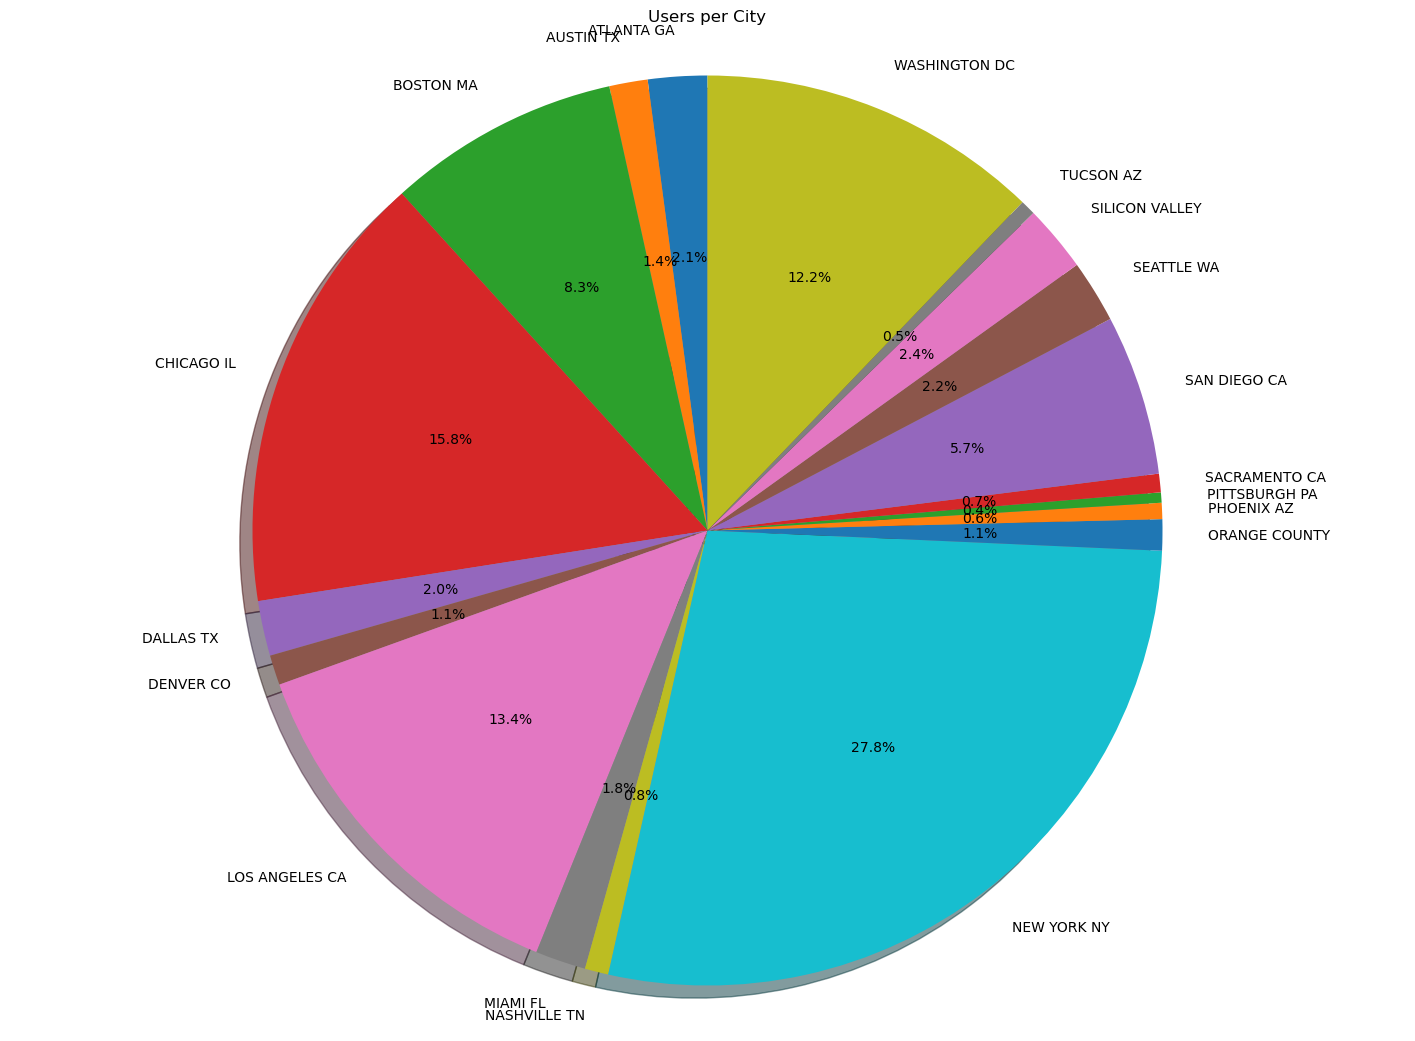

In [51]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

> **From above pie chart, New York City has the highest cab users with 28% followed by Chicago with 16% and Los Angeles with 13%**

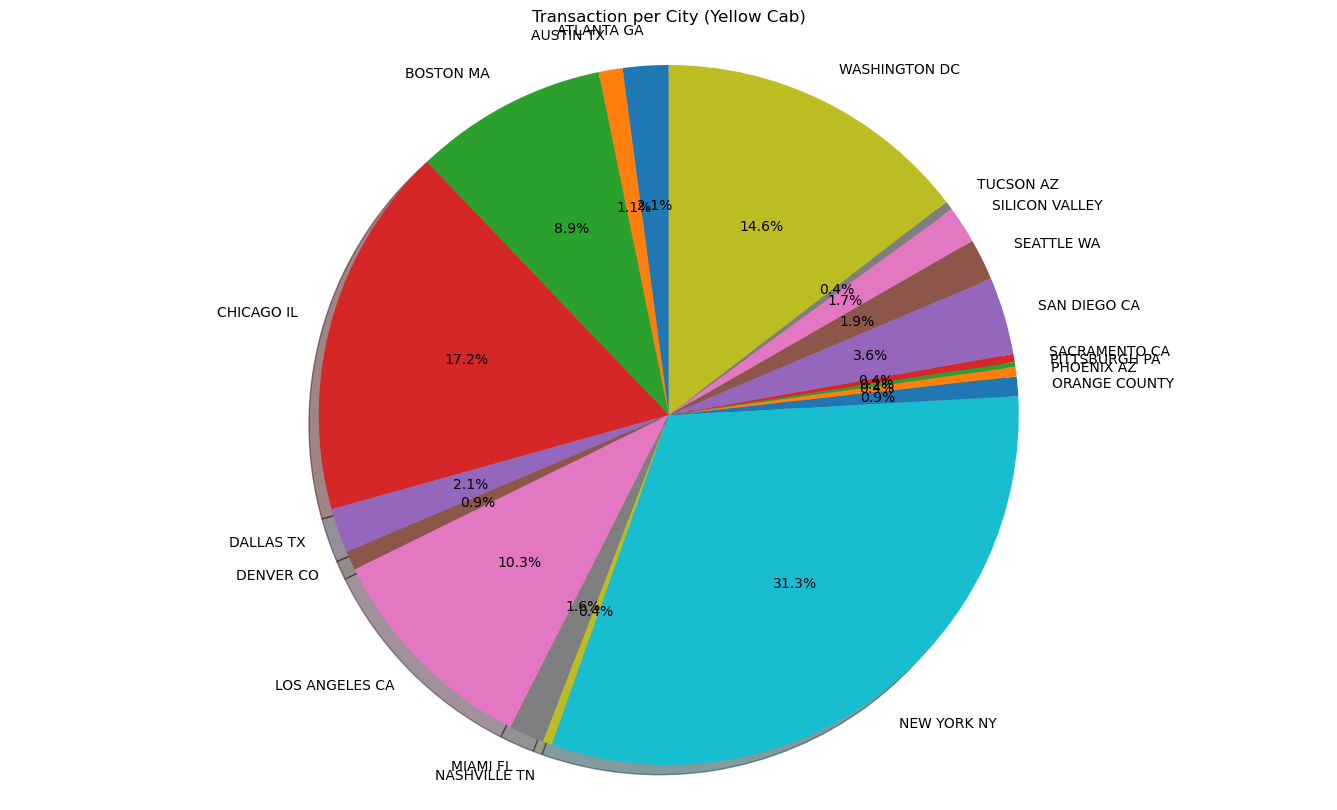

In [52]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City (Yellow Cab)')
plt.show()

In [53]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

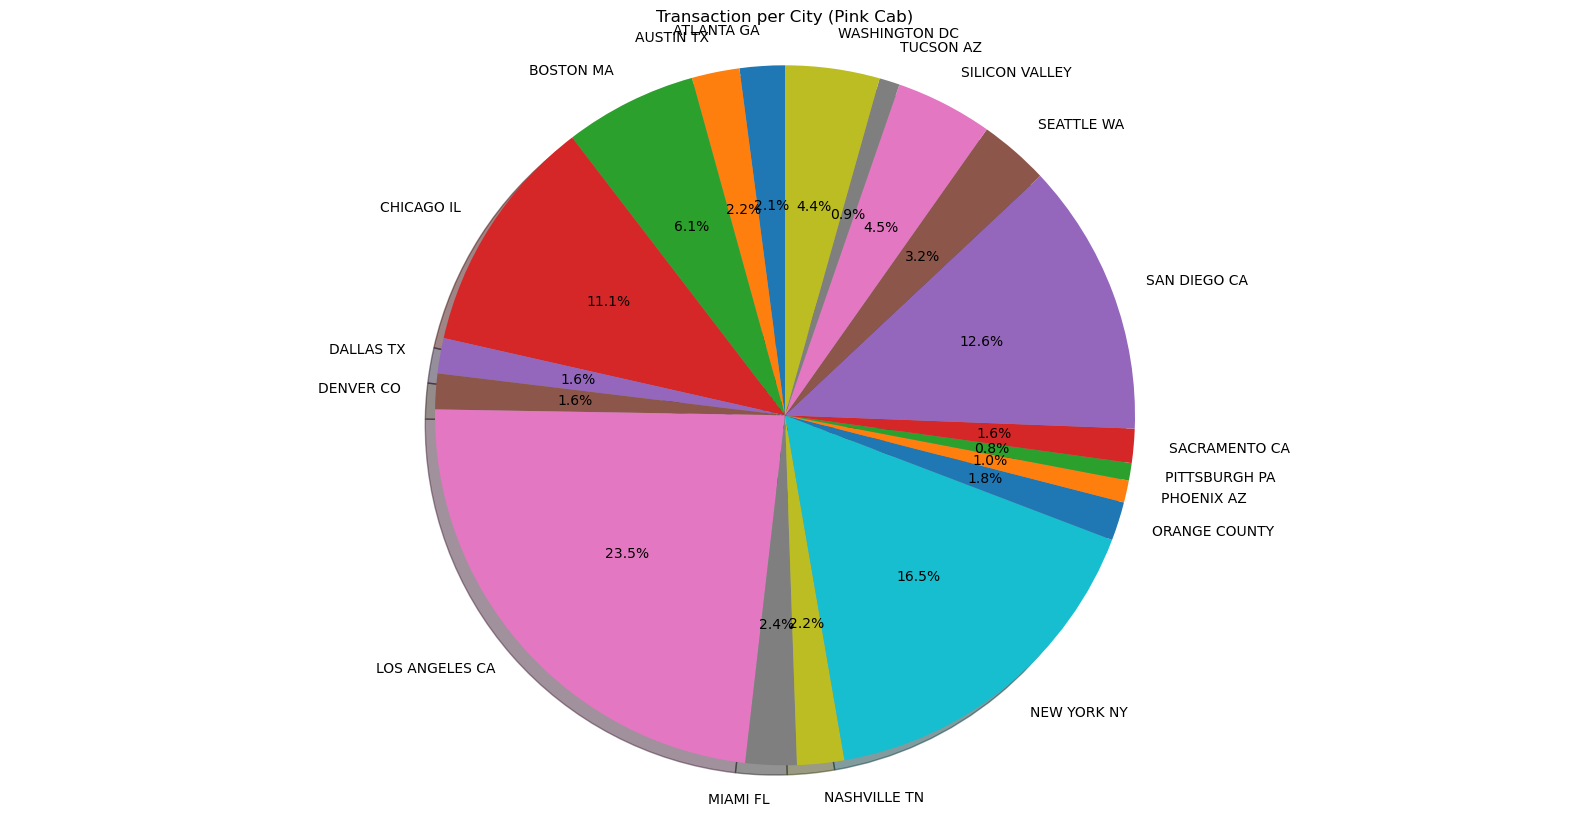

In [54]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City (Pink Cab)')
plt.show()

>**From above pie chart, Yellow Cab has highest transactions in New York City which has the highest Cab Users of 28%.**

>**Also, transactions for Pink Cab is more in Los Angeles City.**

In [55]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

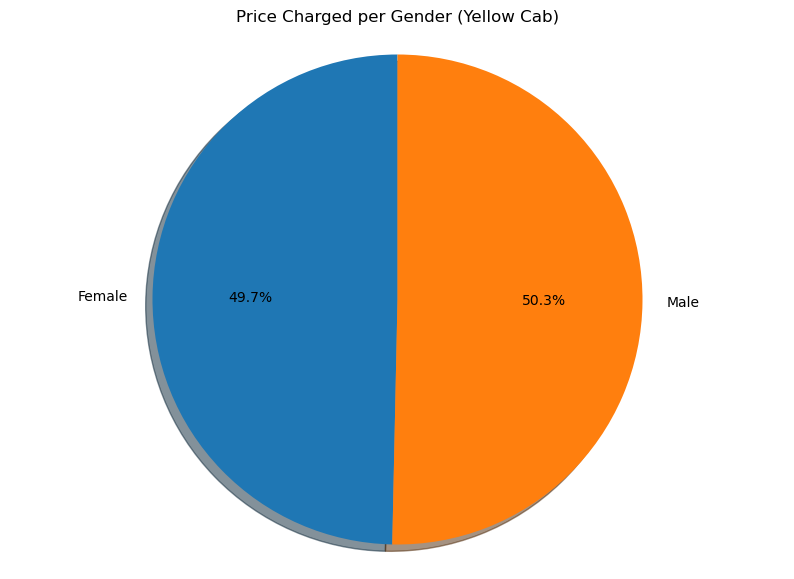

In [56]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender (Yellow Cab)')
plt.show()

In [57]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

>**It is observed that, Yellow Cab charges less for Female Customers whereas Pink Cab charges same for both Male and Female Customers.**

In [58]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

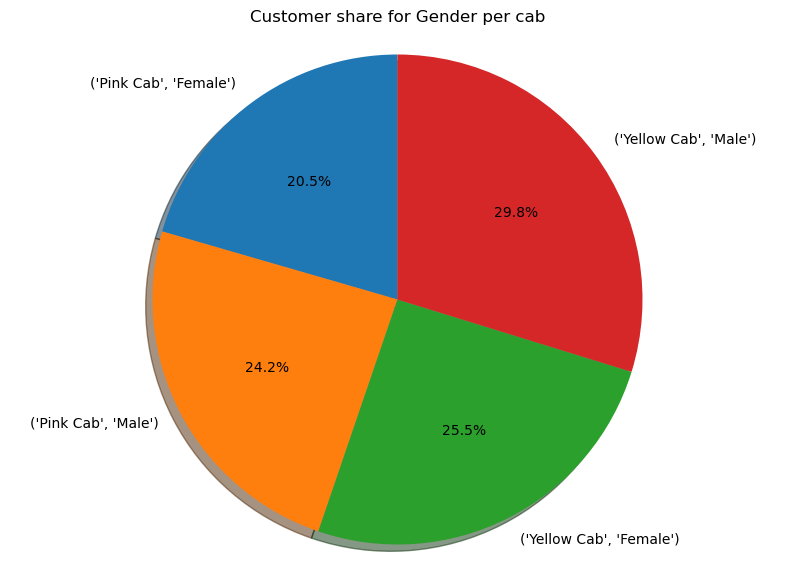

In [59]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share for Gender per cab')
plt.show()

>**It is observed that Female Customers in Yellow Cab are more compared to Male customers**

In [60]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab         30.45   
1        10000012        27703  ATLANTA GA  Pink Cab         28.62   
2        10000013        28712  ATLANTA GA  Pink Cab          9.04   
3        10000014        28020  ATLANTA GA  Pink Cab         33.17   
4        10000015        27182  ATLANTA GA  Pink Cab          8.73   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0         370.95       313.635      1  2016         Card   Male   28   10813   
1         358.52       334.854      1  2016         Card   Male   27    9237   
2         125.20        97.632      1  2016         Cash   Male   53   11242   
3         377.40       351.602      1  2016         Cash   Male   23   23327   
4         114.62        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [61]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

KM_Travelled  Price_Charged  Cost_of_Trip     Month      Year  \
KM_Travelled       1.000000       0.835753      0.981848 -0.001903 -0.001072   
Price_Charged      0.835753       1.000000      0.859812 -0.061116 -0.036409   
Cost_of_Trip       0.981848       0.859812      1.000000 -0.008370 -0.001773   
Month             -0.001903      -0.061116     -0.008370  1.000000 -0.030490   
Year              -0.001072      -0.036409     -0.001773 -0.030490  1.000000   
Age               -0.000369      -0.003084     -0.000189 -0.002226 -0.000579   
Income            -0.000544       0.003228     -0.000633  0.000322 -0.001617   
Margins            0.462768       0.864154      0.486056 -0.096352 -0.060567   

                    Age    Income   Margins  
KM_Travelled  -0.000369 -0.000544  0.462768  
Price_Charged -0.003084  0.003228  0.864154  
Cost_of_Trip  -0.000189 -0.000633  0.486056  
Month         -0.002226  0.000322 -0.096352  
Year          -0.000579 -0.001617 -0.060567  
Age            1.000000  0.003907 -0.005093  
Income         0.003907  1.000000  0.006148  
Margins       -0.005093  0.006148  1.000000

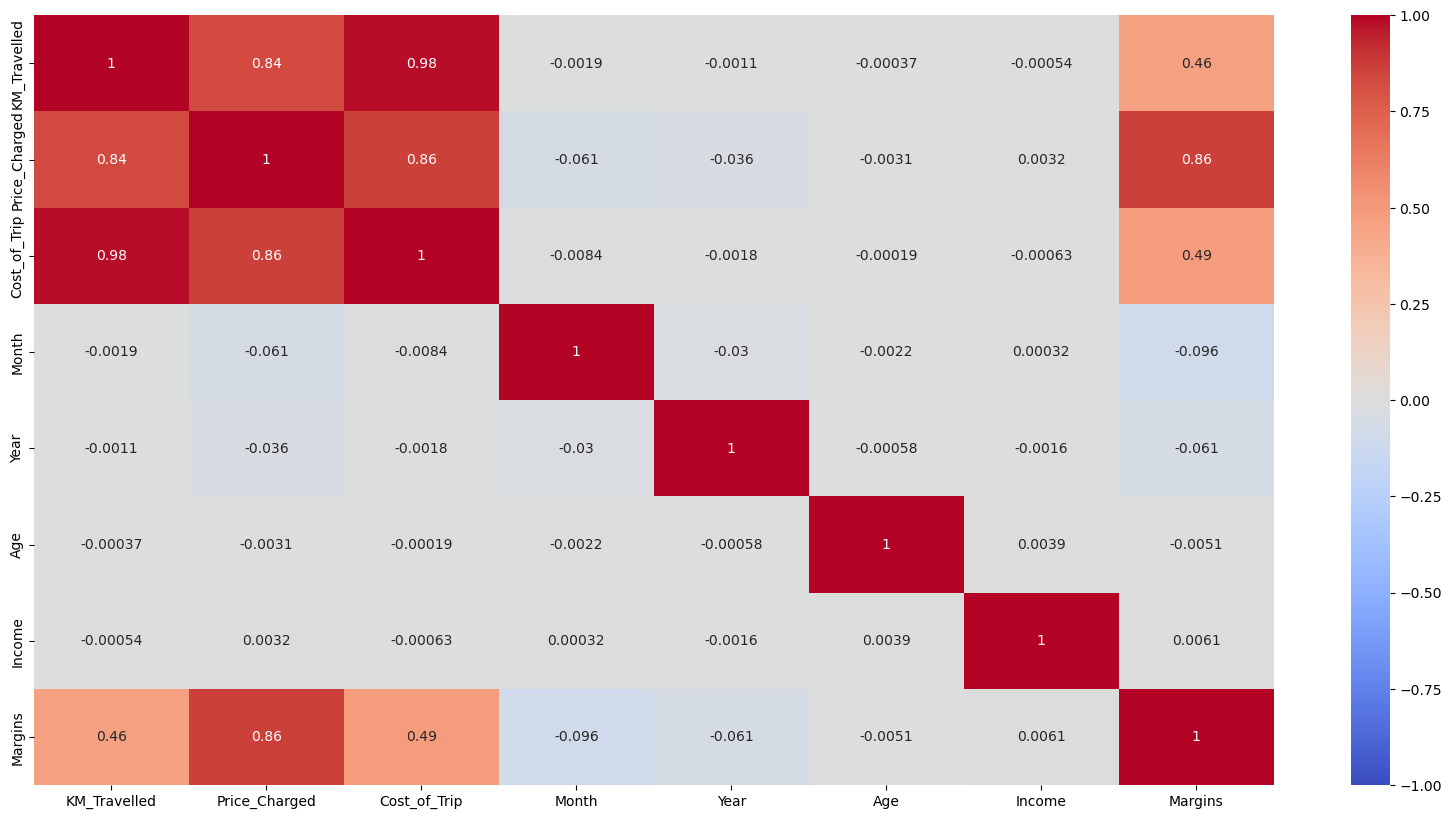

In [62]:
plt.figure(figsize=(20, 10))

# Heatmap
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

plt.show()

>**From above we can see there is a correlation between Margin & Price_Charged**

In [63]:
city_z = data[data.Month==12].groupby('City').Margins.mean()
city_z

City
ATLANTA GA         95.844236
AUSTIN TX          90.535487
BOSTON MA          61.158200
CHICAGO IL         49.166594
DALLAS TX         107.653009
DENVER CO         111.229893
LOS ANGELES CA     78.671170
MIAMI FL           98.341176
NASHVILLE TN       78.562585
NEW YORK NY       256.663241
ORANGE COUNTY      71.696141
PHOENIX AZ         72.779471
PITTSBURGH PA      50.946547
SACRAMENTO CA      23.995713
SAN DIEGO CA       67.587428
SEATTLE WA         75.043692
SILICON VALLEY    161.907324
TUCSON AZ          83.594826
WASHINGTON DC      60.778328
Name: Margins, dtype: float64

In [64]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

### **Margins of Pink Cab:**

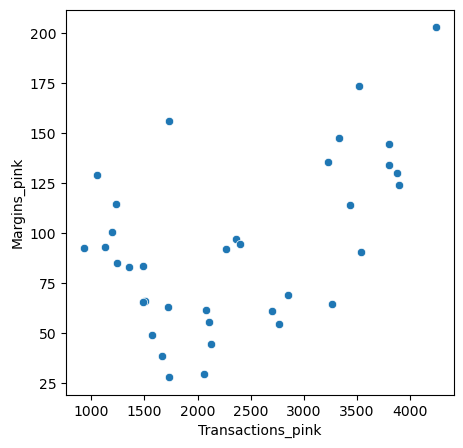

In [65]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

> From above graph, there is increase in margins with increase in number of Transactions for Pink Cabs.

### **Margins for Yellow cab:**

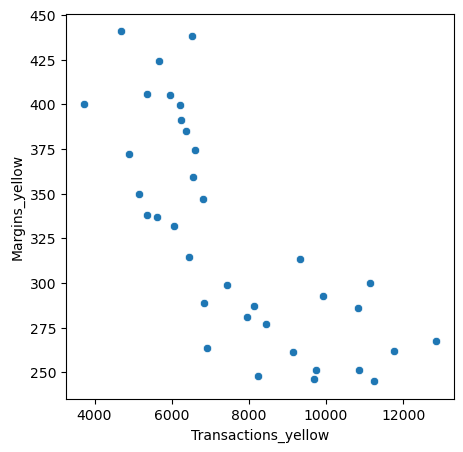

In [66]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

> From above graph, there is decrease in Margin with the increase in Transactions for Yellow Cab.

# **Hypothesis Testing**

### Null Hypothesis: Margin remain the same incase of Gender for both Yellow Cab & Pink Cab

**For Yellow Cabs:**

In [67]:
a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494056e-25


>**Yellow Cab:** It is observed that there is difference in Margin for both Male and Female customers.


**For Pink Cabs:**

In [68]:
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425803


>**Pink Cab:** It is observed that there is no difference in Margin for both Male and Female customers.

In [69]:
#Margins based on Age
data[data.Age<=50].groupby('Company').Margins.mean()
data[data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [70]:
#Pink Cab
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept that there is alternate hypothesis having a difference')
else:
    print('We accept that there is null hypothesis having no difference')
    
print('P value is ', p_value)

71228 13483
We accept that there is null hypothesis having no difference
P value is  0.32817487547980695


In [71]:
# For Yellow Cab
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept that there is alternate hypothesis having a difference')
else:
    print('We accept that there is null hypothesis having no difference')
    
print('P value is ', p_value)

231480 43201
We accept that there is alternate hypothesis having a difference
P value is  6.4942568177993685e-09


>**It is observed that Yellow Cabs provided discount to people who are older than 50**

>**It is observed that there is difference in margins for Card payer and Cash payers**

In [72]:
# For Pink Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept that there is alternate hypothesis having a difference')
else:
    print('We accept that there is null hypothesis having no difference')
    
print('P value is ', p_value)

We accept that there is null hypothesis having no difference
P value is  0.7900465828793286


In [73]:
#Yellow Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept that there is alternate hypothesis having statistical difference')
else:
    print('We accept that there is null hypothesis having no statistical difference')
    
print('P value is ', p_value)

We accept that there is null hypothesis having no statistical difference
P value is  0.29330606382987284


>**It is observed that there is no difference in Margin incase of mode of Payment for both Yellow & Pink Cab.**

In [74]:
data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab         30.45   
1        10000012        27703  ATLANTA GA  Pink Cab         28.62   
2        10000013        28712  ATLANTA GA  Pink Cab          9.04   
3        10000014        28020  ATLANTA GA  Pink Cab         33.17   
4        10000015        27182  ATLANTA GA  Pink Cab          8.73   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0         370.95       313.635      1  2016         Card   Male   28   10813   
1         358.52       334.854      1  2016         Card   Male   27    9237   
2         125.20        97.632      1  2016         Cash   Male   53   11242   
3         377.40       351.602      1  2016         Cash   Male   23   23327   
4         114.62        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [75]:
data.to_csv('master_data.csv',index = False)